In [16]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

cleanInsurance = pd.read_csv("sets/insurance_clean.csv")
plotPalette = "Blues"

def save_plot(plot, fileName):
    figure = plot.get_figure()
    figure.set_size_inches(8, 8)
    figure.savefig("../results/" + fileName + ".png")

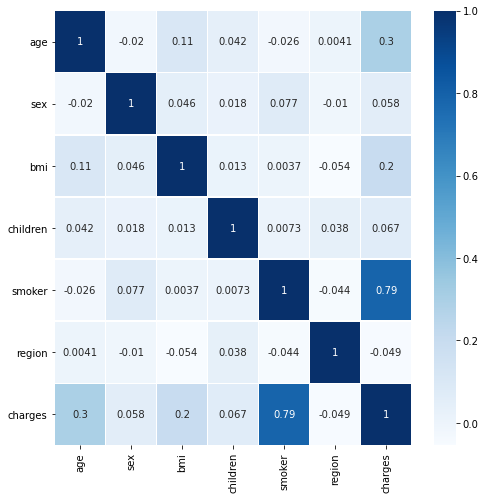

In [17]:
correlation = cleanInsurance.corr()
heatmap = sb.heatmap(correlation, annot = True, cmap = plotPalette, linewidths = 0.5)
save_plot(heatmap, "correlation")
plt.show()

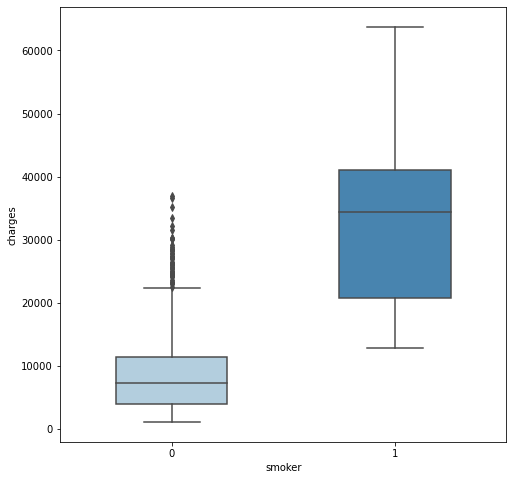

In [18]:
boxplot = sb.boxplot(x = "smoker", y = "charges", data = cleanInsurance, palette = plotPalette, width = 0.5, linewidth = 1.5)
save_plot(boxplot, "smoker_charges_plot")
plt.show()

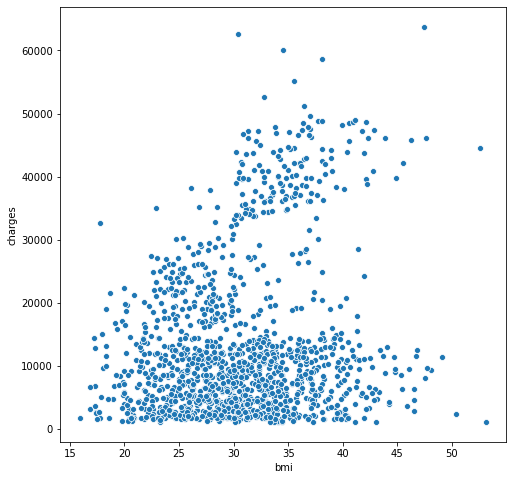

In [19]:
scatterplot = sb.scatterplot(x = "bmi", y = "charges", data = cleanInsurance, palette = plotPalette)
save_plot(scatterplot, "bmi_charges_plot")
plt.show()

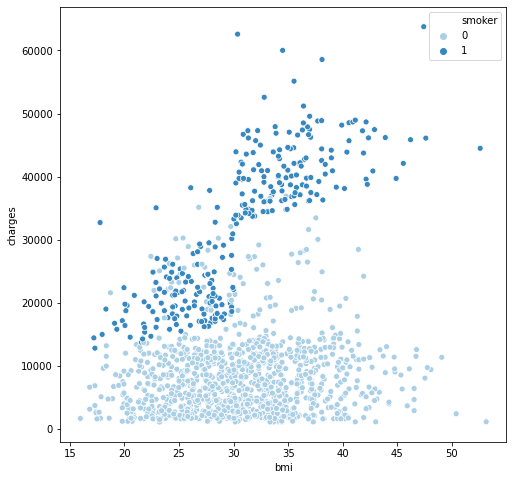

In [20]:
scatterplot = sb.scatterplot(x = "bmi", y = "charges", hue = "smoker", data = cleanInsurance, palette = plotPalette)
save_plot(scatterplot, "bmi_charges_smoker_plot")
plt.show()

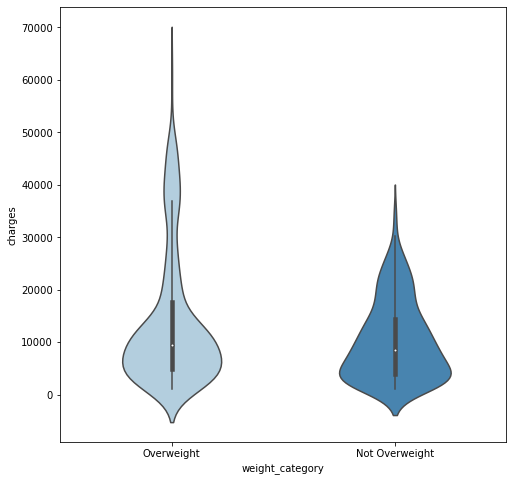

In [23]:
weightInsurance = cleanInsurance.copy()
weightInsurance["weight_category"] = np.where(cleanInsurance["bmi"] > 25, "Overweight", "Not Overweight")

violinplot = sb.violinplot(x = "weight_category", y = "charges", data = weightInsurance, palette = plotPalette, width = 0.5, linewidth = 1.5)
save_plot(violinplot, "weight_charges_plot")
plt.show()

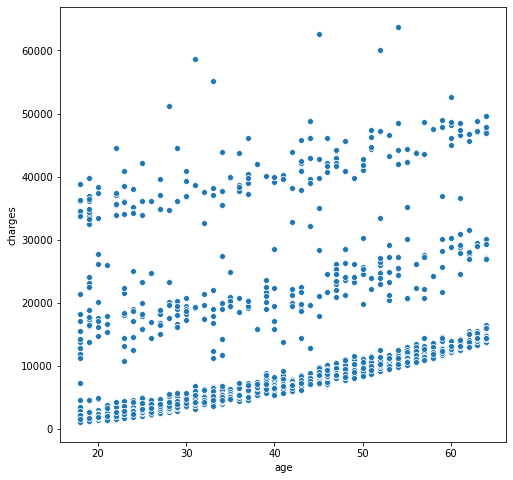

In [24]:
scatterplot = sb.scatterplot(x = "age", y = "charges", data = cleanInsurance, palette = plotPalette)
save_plot(scatterplot, "age_charges_plot")
plt.show()

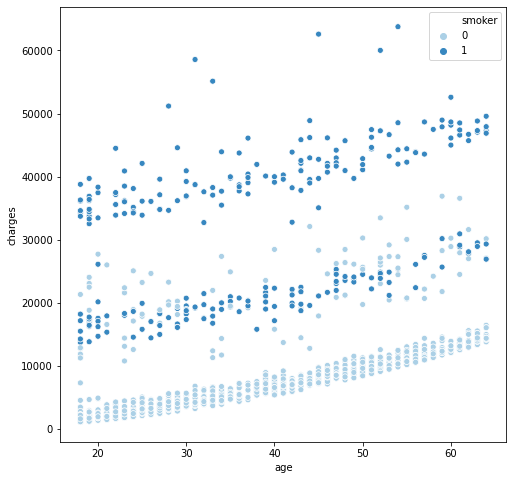

In [25]:
scatterplot = sb.scatterplot(x = "age", y = "charges", hue = "smoker", data = cleanInsurance, palette = plotPalette)
save_plot(scatterplot, "age_charges_smoker_plot")
plt.show()